In [1]:
import os,sys
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import scipy as sp
import scipy.integrate as spint8
import GWGen; from GWGen import WFGenerator; from GWGen.Utils import *
from GWGen.WFGenerator import *
from few.utils.utility import get_separatrix
from superrad import ultralight_boson;
import time
import cProfile, pstats
from pstats import SortKey

M = 1e6
mu = 1e1
procamass=0.8e-17 # eV
a = 0.9
p0 = 10.0
e0 = 0.001
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.
qS = 0.2
phiS = 0.2
qK = 0.
phiK = 0.
dist = 1.0
mich = True
dt = 15.0
T = 8

use_gpu = False
inspkw = {"npoints":100}
sumkwargs = {"use_gpu": use_gpu, "pad_output": False}
alphavalue(M,procamass)

def profiler(func,*args):
    pr = cProfile.Profile()
    pr.enable()
    func(*args)
    pr.disable()
    sortby=SortKey.CUMULATIVE
    ps = pstats.Stats(pr).sort_stats('tottime')
    ps.print_stats()

In [12]:
diffeq = PN(M,mu)
pr = cProfile.Profile()
pr.enable()
diffeq(0,[6.,0.7,0,0])
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

         151 function calls (147 primitive calls) in 0.003 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002    0.002    0.002 {pyUtility.pyGetSeparatrix}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
      8/4    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.002    0.002 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/WFGenerator/Kludge.py:104(__call__)
        1    0.000    0.000    0.000    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:82(<lambda>)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(empty_like)
        1    0.000    0.000    0.002    0.002 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/utils/utility.py:363(get_separatrix)
        1    0.000    0.000    0.0

In [13]:
traj = PNTraj()
pr = cProfile.Profile()
pr.enable()
traj(M,mu,a,p0,e0,Y0, npoints=120,dense_output=True)
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

         240919 function calls (232122 primitive calls) in 0.350 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2037    0.085    0.000    0.095    0.000 {pyUtility.pyGetSeparatrix}
     1907    0.046    0.000    0.049    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:82(<lambda>)
     1907    0.035    0.000    0.036    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:87(<lambda>)
     1907    0.022    0.000    0.024    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:72(<lambda>)
     1907    0.022    0.000    0.023    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:77(<lambda>)
     1907    0.016    0.000    0.274    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/WFGenerator/Kludge.py:104(__call__)
20006/11212    0.014    0.000    0.043    0.000 {built-in method numpy.core._multiarray_umath.implement_array_functi

In [14]:
emriwop = EMRIWaveform(inspiral_kwargs=inspkw.copy(),sum_kwargs=sumkwargs.copy(),use_gpu=use_gpu)
pr = cProfile.Profile()
pr.enable()
wvop = emriwop(M,mu,a,p0,e0,Y0,qS,phiS,qK,phiK,dist,T=T)
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

         120627 function calls (115937 primitive calls) in 1.499 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.215    1.215    1.215    1.215 {pycpuAAK.pyWaveform}
     1049    0.070    0.000    0.075    0.000 {pyUtility.pyGetSeparatrix}
        2    0.052    0.026    0.052    0.026 {method 'searchsorted' of 'numpy.ndarray' objects}
      908    0.022    0.000    0.023    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:82(<lambda>)
      908    0.016    0.000    0.017    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/Kerr.py:87(<lambda>)
       56    0.012    0.000    0.012    0.000 {built-in method numpy.arange}
        1    0.012    0.012    1.296    1.296 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:114(sum)
      908    0.011    0.000    0.011    0.000 /mnt/Data_Volume/Documents/Github/GWGenerator/

In [3]:
ub = ultralight_boson.UltralightBoson(spin=1,model="relativistic");

In [4]:
emrip = EMRIWithProcaWaveform(inspiral_kwargs=inspkw.copy(), sum_kwargs=sumkwargs.copy(), use_gpu=False)
traj = PNTraj()

In [17]:
pr = cProfile.Profile()
pr.enable()
wvp=emrip(M,mu,procamass,a,p0,e0,Y0,T=T,UltralightBoson=ub,qS=qS,qK=qK,phiS=phiS,phiK=phiK,dist=dist,npoints=100)
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

         330354 function calls (325565 primitive calls) in 3.901 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.169    1.169    1.169    1.169 {pycpuAAK.pyWaveform}
     3679    0.636    0.000    1.235    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/superrad/rel_vec_cloud.py:92(omega_real)
        1    0.564    0.564    0.565    0.565 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/superrad/rel_vec_cloud.py:127(omega_imag)
     3679    0.525    0.000    0.557    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/superrad/rel_vec_cloud.py:223(_deltaomega)
     7264    0.290    0.000    0.290    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:1054(integral)
     1049    0.117    0.000    0.122    0.000 {pyUtility.

In [19]:
len(wvp)

6615249

In [26]:
td = np.arange(len(wvp))*dt

pr = cProfile.Profile()
pr.enable()
WaveformInnerProduct(td,wvp,wvop)
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

         219 function calls in 2.770 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    1.288    0.644    1.954    0.977 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/pyfftw/interfaces/_utils.py:51(_Xfftn)
        2    0.340    0.170    0.611    0.306 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/pyfftw/builders/_utils.py:146(_Xfftn)
        1    0.285    0.285    0.285    0.285 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/HelperFunctions.py:305(ConfusionNoise)
        4    0.242    0.061    0.242    0.061 {method 'copy' of 'numpy.ndarray' objects}
        1    0.128    0.128    0.128    0.128 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/HelperFunctions.py:296(AccelNoise)
        1    0.107    0.107    0.582    0.582 /mnt/Data_Volume/Documents/Github/GWGenerator/GWGen/Utils/HelperFunctions.py:275(LisaSensitivi

In [27]:
pr = cProfile.Profile()
pr.enable()
sp.fft.fft(wvop)
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

         59 function calls in 1.673 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.672    1.672    1.672    1.672 {built-in method scipy.fft._pocketfft.pypocketfft.c2c}
        1    0.000    0.000    1.673    1.673 <ipython-input-27-5152cb813f5a>:3(<module>)
        2    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        2    0.000    0.000    1.673    0.836 /home/shaunf/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3400(run_code)
        1    0.000    0.000    0.000    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/scipy/fft/_pocketfft/helper.py:80(_asfarray)
        6    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        2    0.000    0.000    0.000    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/codeop.py:140(__call__)
        1    0.000    0.000    1.672   

In [28]:
import pyfftw
import multiprocessing
pyfftw.config.NUM_THREADS = multiprocessing.cpu_count()
pyfftw.interfaces.cache.enable()

with sp.fft.set_backend(pyfftw.interfaces.scipy_fft):
    pr = cProfile.Profile()
    pr.enable()
    sp.fft.fft(wvop)
    pr.disable()
    sortby = SortKey.CUMULATIVE
    ps = pstats.Stats(pr).sort_stats('tottime')
    ps.print_stats()

         57 function calls in 0.834 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.592    0.592    0.827    0.827 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/pyfftw/interfaces/_utils.py:51(_Xfftn)
        1    0.171    0.171    0.215    0.215 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/pyfftw/builders/_utils.py:146(_Xfftn)
        2    0.040    0.020    0.040    0.020 {method 'copy' of 'numpy.ndarray' objects}
        1    0.024    0.024    0.024    0.024 {built-in method pyfftw.pyfftw.byte_align}
        1    0.007    0.007    0.834    0.834 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/pyfftw/interfaces/numpy_fft.py:96(fft)
        1    0.000    0.000    0.215    0.215 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/pyfftw/builders/builders.py:285

In [25]:
scipy.fftpack = pyfftw.interfaces.scipy_fftpack
profiler(sp.fft.fft, (wvop))

         13 function calls in 1.898 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.898    1.898    1.898    1.898 {built-in method scipy.fft._pocketfft.pypocketfft.c2c}
        1    0.000    0.000    0.000    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/scipy/fft/_pocketfft/helper.py:80(_asfarray)
        1    0.000    0.000    1.898    1.898 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/scipy/fft/_pocketfft/basic.py:11(c2c)
        1    0.000    0.000    1.898    1.898 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/scipy/fft/_backend.py:17(__ua_function__)
        2    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        1    0.000    0.000    0.000    0.000 {method 'newbyteorder' 

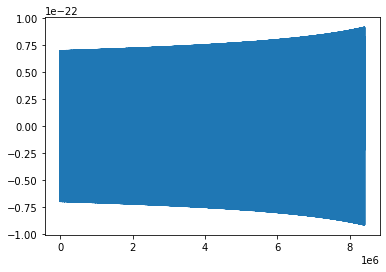

In [13]:
import matplotlib.pyplot as plt
plt.plot(wvp.imag)

In [14]:
pr = cProfile.Profile()
pr.enable()
wvp=emrip(100000,10,1.3e-16,0.6,35.4,0.2,Y0,T=4,UltralightBoson=ub,qS=qS,qK=qK,phiS=phiS,phiK=phiK,dist=dist,npoints=100)
pr.disable()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr).sort_stats('tottime')
ps.print_stats()

/mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."
/mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:244: UserWarning: qK is within 1e-6 of the poles. We shift this value automatically away from poles by 1e-6.
  "qK is within 1e-6 of the poles. We shift this value automatically away from poles by 1e-6."


         568750 function calls (561153 primitive calls) in 18.402 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1733   13.315    0.008   13.327    0.008 {pyUtility.pyGetSeparatrix}
        1    3.362    3.362    3.362    3.362 {pycpuAAK.pyWaveform}
    12976    0.376    0.000    0.376    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:1054(integral)
     6535    0.144    0.000    0.318    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/superrad/rel_vec_cloud.py:92(omega_real)
    13071    0.136    0.000    0.146    0.000 /mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/superrad/rel_vec_cloud.py:210(_y)
        6    0.077    0.013    0.077    0.013 {method 'searchsorted' of 'numpy.ndarray' objects}
     9732    0.072    0.000    0.072    0.000 /mnt/Data_Volume/Docum